# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

## Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

## Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


## About The Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

#### You are provided with following 2 files:

1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.


#### Dataset Attributes

Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign

## Output variable (desired target):

•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)

## Dataset Link-

•	https://github.com/dsrscientist/dataset5
    
•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv
    
•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv

In [1]:
from IPython.display import Image

Image(url="https://www.wintwealth.com/blog/wp-content/uploads/2022/11/term-deposit-vs-fixed-deposit.jpg")

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')

In [3]:
bank.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
bank.shape

(31647, 18)

In [5]:
bank.describe(include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647,31647,31647,31647,31647.000000,31647,31647,31647,31647.000000,31647,31647.000000,31647.000000,31647.000000,31647.000000,31647,31647
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,6842,19095,16224,31062,NaN,17584,26516,20423,NaN,9669,NaN,NaN,NaN,NaN,25929,27932
mean,22563.972162,40.957247,NaN,NaN,NaN,NaN,1363.890258,NaN,NaN,NaN,15.835466,NaN,258.113534,2.765697,39.576042,0.574272,NaN,NaN
std,13075.936990,10.625134,NaN,NaN,NaN,NaN,3028.304293,NaN,NaN,NaN,8.337097,NaN,257.118973,3.113830,99.317592,2.422529,NaN,NaN
min,2.000000,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,11218.000000,33.000000,NaN,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,8.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,22519.000000,39.000000,NaN,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,33879.500000,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,318.500000,3.000000,-1.000000,0.000000,NaN,NaN


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [7]:
categorical = ['job', 'marital','education','default','housing','loan','contact','month','poutcome']
numerical = [x for x in bank.columns.to_list() if x not in categorical]
numerical.remove('subscribed')

In [8]:

print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Text(0.5, 0, 'Target class')

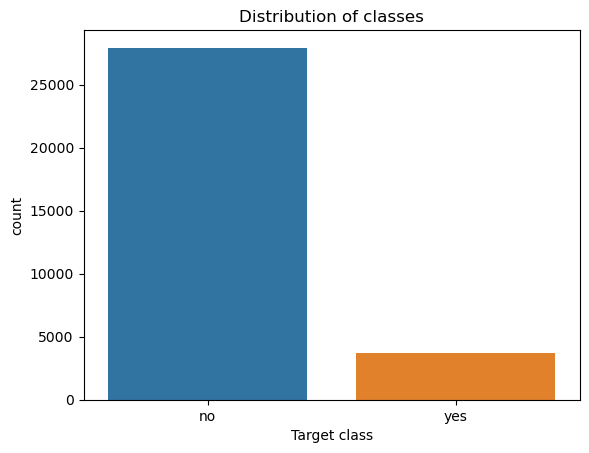

In [9]:
from matplotlib import pyplot as plt
sns.countplot(x=bank['subscribed'])
plt.title('Distribution of classes')
plt.xlabel('Target class')

In [10]:
bank.subscribed.value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

# Data Analysis

Text(0.5, 0, 'y: target variable')

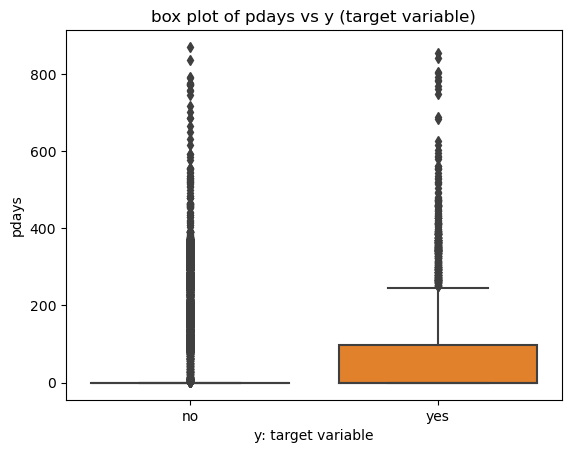

In [11]:
sns.boxplot (y = bank['pdays'], x= bank['subscribed'])
plt.title('box plot of pdays vs y (target variable)')
plt.xlabel('y: target variable')

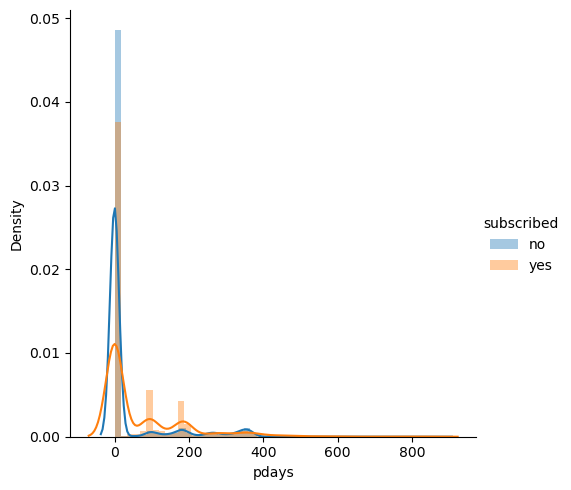

In [12]:
sns.FacetGrid(bank, hue ='subscribed', size=5)\
.map(sns.distplot, 'pdays')\
.add_legend()

In [13]:
bank.pdays.describe()

count    31647.000000
mean        39.576042
std         99.317592
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [14]:
for x in range(95, 101, 1):
    print("{}% of pdays are less than equal to {}".format(x,bank.pdays.quantile(x/100)))
    iqr = bank.pdays.quantile(0.75) - bank.pdays.quantile(0.25)
    print('IQR{}'.format(iqr))

95% of pdays are less than equal to 313.0
IQR0.0
96% of pdays are less than equal to 336.0
IQR0.0
97% of pdays are less than equal to 348.0
IQR0.0
98% of pdays are less than equal to 358.0
IQR0.0
99% of pdays are less than equal to 370.0
IQR0.0
100% of pdays are less than equal to 871.0
IQR0.0


# Duration

Text(0.5, 0, 'y:target variable')

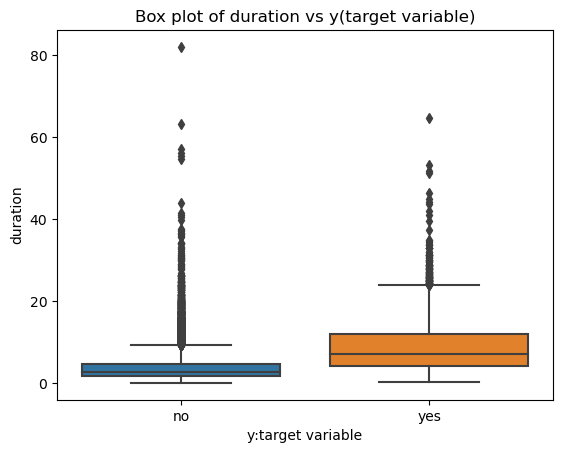

In [16]:
bank['duration'] = bank['duration']/60
sns.boxplot(y=bank['duration'], x=bank['subscribed'])
plt.title('Box plot of duration vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 1.0, 'PDF of duration for target variale y')

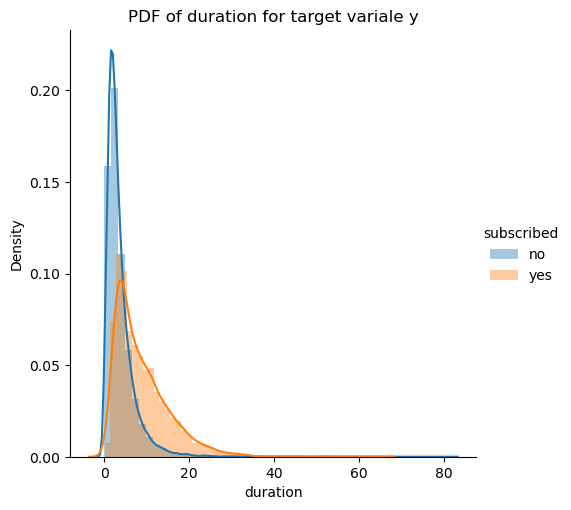

In [17]:
sns.FacetGrid(bank, hue='subscribed', size=5)\
.map(sns.distplot, 'duration')\
.add_legend()
plt.title('PDF of duration for target variale y')

In [18]:
bank.duration.describe()


count    31647.000000
mean         4.301892
std          4.285316
min          0.000000
25%          1.733333
50%          3.000000
75%          5.308333
max         81.966667
Name: duration, dtype: float64

In [19]:
for x in range(95, 101, 1):
    print("{}% of call have duration are less than equal to {}".format(x,bank.duration.quantile(x/100)))
iqr = bank.duration.quantile(0.75) - bank.duration.quantile(0.25)
print('IQR{}'.format(iqr))

95% of call have duration are less than equal to 12.533333333333333
96% of call have duration are less than equal to 13.716666666666667
97% of call have duration are less than equal to 15.183333333333334
98% of call have duration are less than equal to 17.433333333333334
99% of call have duration are less than equal to 20.983333333333334
100% of call have duration are less than equal to 81.96666666666667
IQR3.575


# previous

Text(0.5, 0, 'y: target variable')

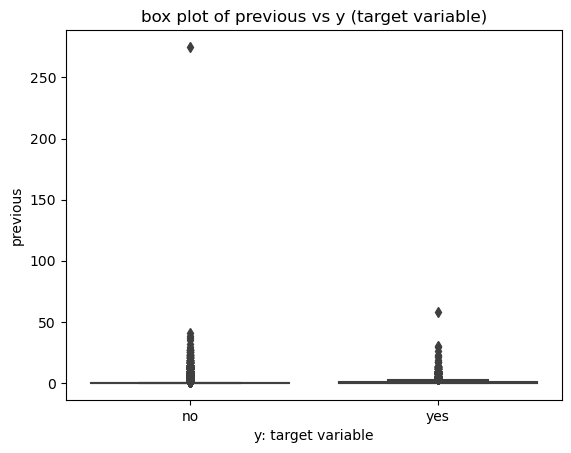

In [20]:
sns.boxplot (y = bank['previous'], x= bank['subscribed'])
plt.title('box plot of previous vs y (target variable)')
plt.xlabel('y: target variable')

Text(0.5, 1.0, 'PDF of duration for target variale y')

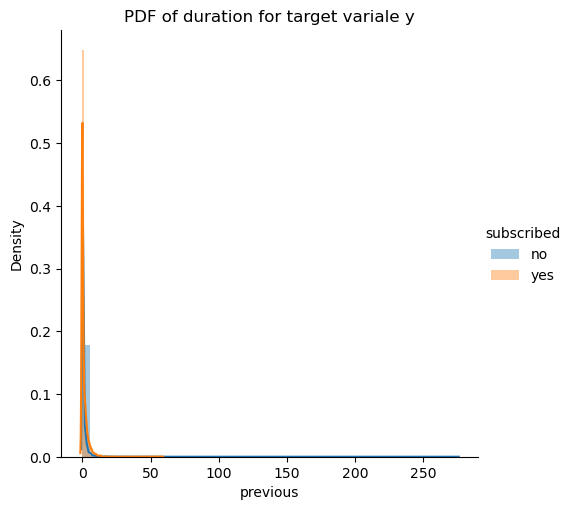

In [21]:
sns.FacetGrid(bank, hue='subscribed', size=5)\
.map(sns.distplot, 'previous')\
.add_legend()
plt.title('PDF of duration for target variale y')

In [22]:
bank.previous.describe()

count    31647.000000
mean         0.574272
std          2.422529
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [23]:
for x in range(95, 101, 1):
    print("{}% of previous values are less than equal to {}".format(x,bank.previous.quantile(x/100)))
iqr = bank.previous.quantile(0.75) - bank.previous.quantile(0.25)
print('IQR{}'.format(iqr))

95% of previous values are less than equal to 3.0
96% of previous values are less than equal to 4.0
97% of previous values are less than equal to 5.0
98% of previous values are less than equal to 6.0
99% of previous values are less than equal to 9.0
100% of previous values are less than equal to 275.0
IQR0.0


# Age

Text(0.5, 0, 'y: target variable')

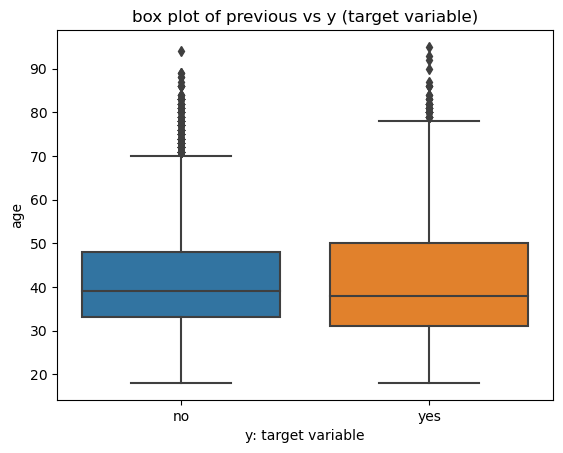

In [24]:

sns.boxplot (y = bank['age'], x= bank['subscribed'])
plt.title('box plot of previous vs y (target variable)')
plt.xlabel('y: target variable')

Text(0.5, 1.0, 'PDF of duration for target variale y')

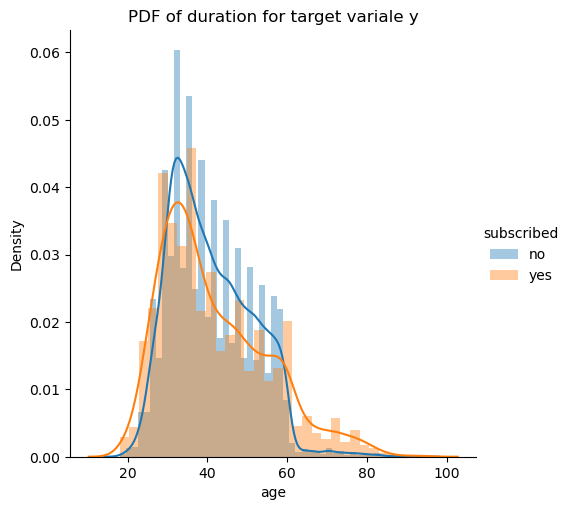

In [25]:
sns.FacetGrid(bank, hue='subscribed', size=5)\
.map(sns.distplot, 'age')\
.add_legend()
plt.title('PDF of duration for target variale y')

In [26]:
bank.age.describe()

count    31647.000000
mean        40.957247
std         10.625134
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [27]:

for x in range(95, 101, 1):
    print("{}% of people having age are less than equal to {}".format(x,bank.age.quantile(x/100)))
iqr = bank.age.quantile(0.75) - bank.age.quantile(0.25)
print('IQR{}'.format(iqr))

95% of people having age are less than equal to 59.0
96% of people having age are less than equal to 59.0
97% of people having age are less than equal to 60.0
98% of people having age are less than equal to 63.0
99% of people having age are less than equal to 71.0
100% of people having age are less than equal to 95.0
IQR15.0


In [28]:
lst =[bank]
for column in lst:
    column.loc[column["age"]<30, 'age_group'] = 30
    column.loc[(column["age"] >=30) & (column["age"] <=44), 'age_group'] = 40
    column.loc[(column["age"] >=45) & (column["age"] <=59), 'age_group'] = 50
    column.loc[column["age"]<30, 'age_group'] = 30

In [29]:
count_age_response_pct = pd.crosstab(bank['subscribed'],bank['age_group']).apply(lambda x: x/x.sum()*100)
count_age_response_pct = count_age_response_pct.transpose()

<AxesSubplot:xlabel='age_group', ylabel='count'>

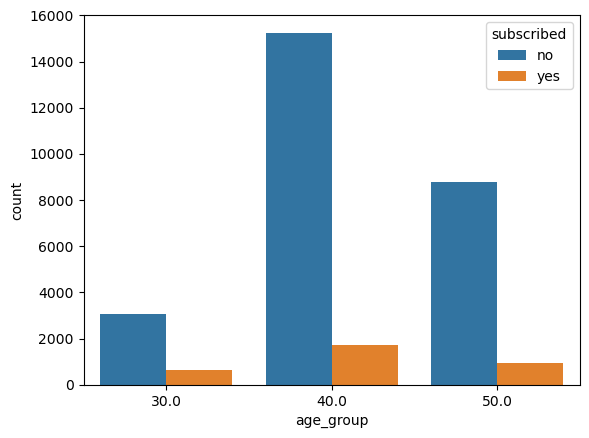

In [30]:
sns.countplot(x = 'age_group', data = bank, hue = 'subscribed')

In [35]:
print('Success rate and total clients contacted for different age_groups:')
print('Clients age < 30 contacted: {}, Success rate: {}'.format(len(bank[bank['age_group'] == 30]), bank[bank['age_group'] == 30].subscribed.value_counts()[1]/len(bank[bank['age_group'] == 30])))
print('Clients of age 30-45 contacted: {}, Success rate: {}'.format(len(bank[bank['age_group'] == 40]), bank[bank['age_group'] == 40].subscribed.value_counts()[1]/len(bank[bank['age_group'] == 40])))
print('Clients of age 40-60 contacted: {}, Success rate: {}'.format(len(bank[bank['age_group'] == 50]), bank[bank['age_group'] == 50].subscribed.value_counts()[1]/len(bank[bank['age_group'] == 50])))

clients_60_plus = bank[bank['age_group'] == 60]
success_rate_60_plus = clients_60_plus.subscribed.value_counts()[1]/len(clients_60_plus) if 1 in clients_60_plus.subscribed.value_counts() else 0

print('Clients of 60+ age contacted: {}, Success rate: {}'.format(len(clients_60_plus), success_rate_60_plus))

Success rate and total clients contacted for different age_groups:
Clients age < 30 contacted: 3695, Success rate: 0.17510148849797022
Clients of age 30-45 contacted: 16973, Success rate: 0.10145525245978908
Clients of age 40-60 contacted: 9734, Success rate: 0.09656872816930347
Clients of 60+ age contacted: 0, Success rate: 0


# jobs

In [36]:
bank.job.value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

Text(0.5, 1.0, 'Count plot of job for target varianble')

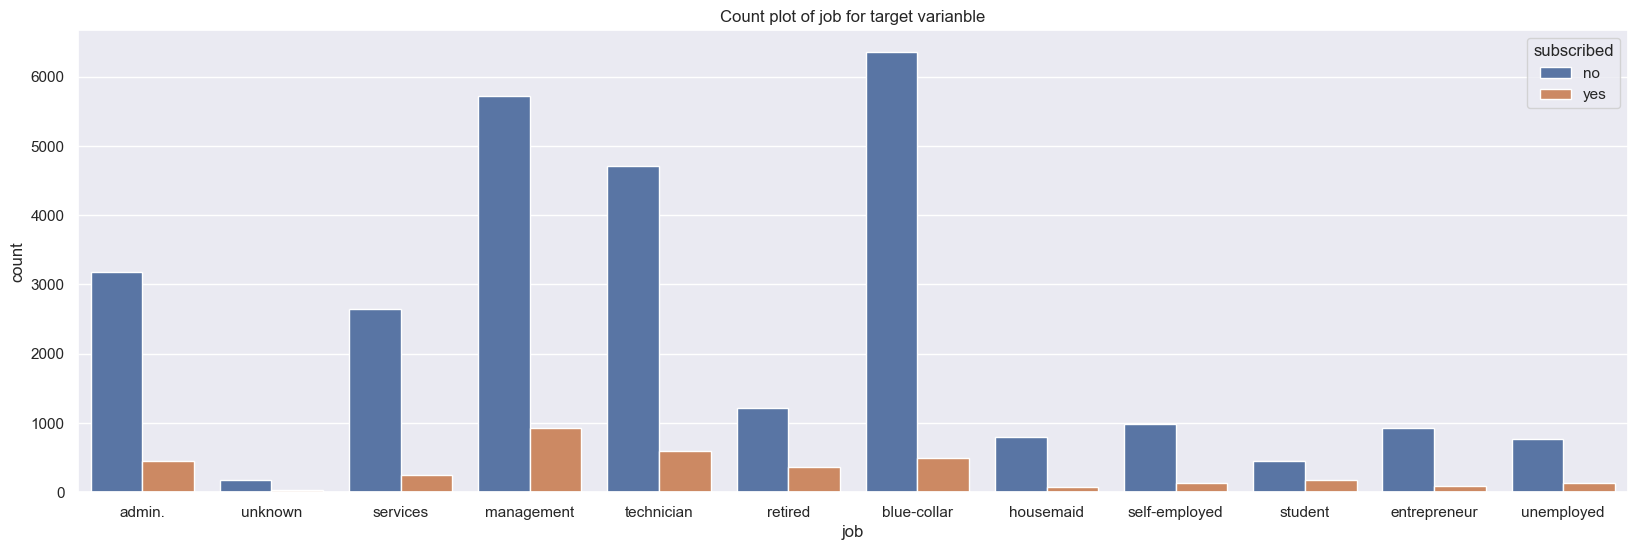

In [37]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=bank['job'], data= bank, hue= bank['subscribed'])
plt.title('Count plot of job for target varianble')

# Outcome

In [38]:
bank.poutcome.value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

Text(0.5, 1.0, 'Count plot of job for target varianble')

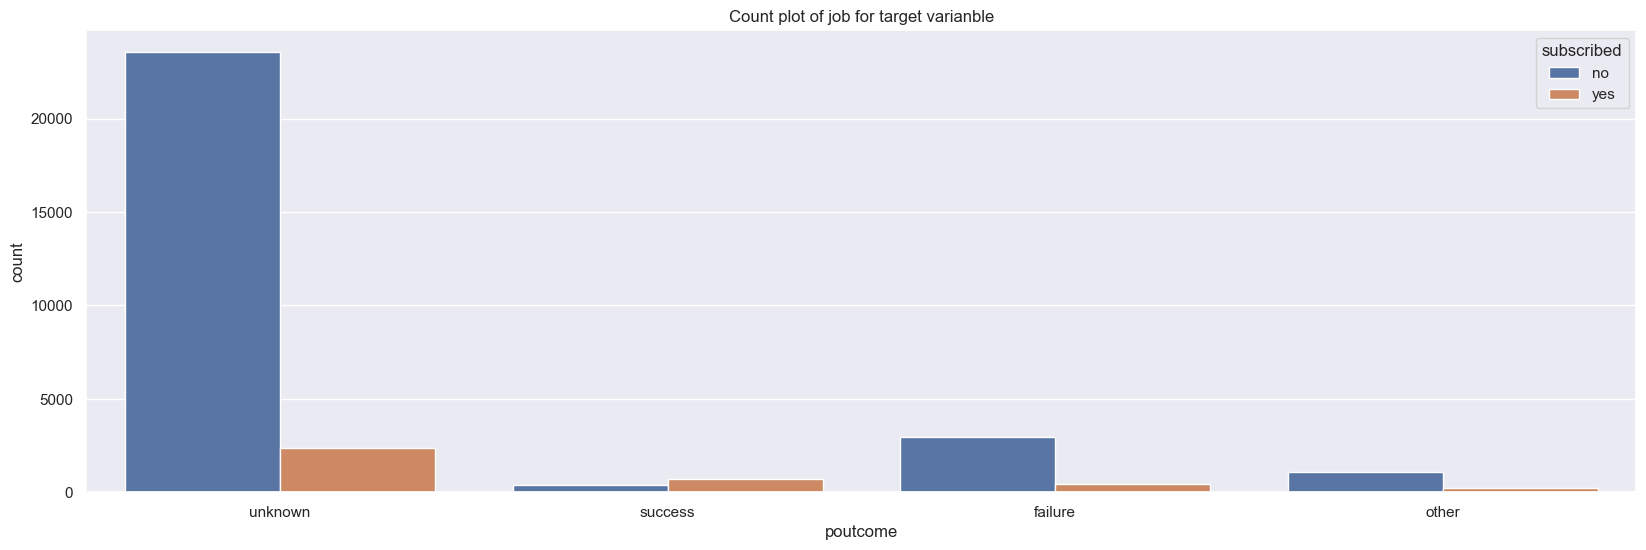

In [39]:
sns.countplot(x=bank['poutcome'], data= bank, hue= bank['subscribed'])
plt.title('Count plot of job for target varianble')

# Education

In [40]:
bank.education.value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

Text(0.5, 1.0, 'Count plot of job for target varianble')

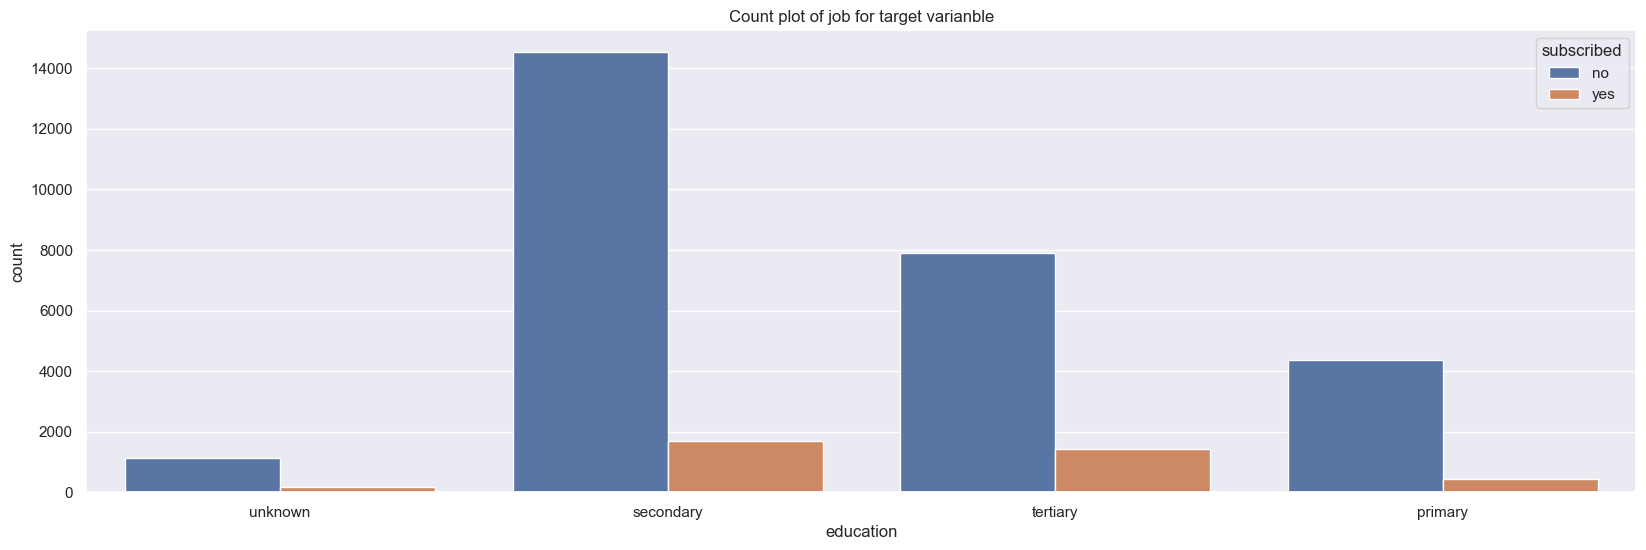

In [41]:
sns.countplot(x=bank['education'], data= bank, hue= bank['subscribed'])
plt.title('Count plot of job for target varianble')

# Default

In [42]:
bank.default.value_counts()

no     31062
yes      585
Name: default, dtype: int64

Text(0.5, 1.0, 'Count plot of job for target varianble')

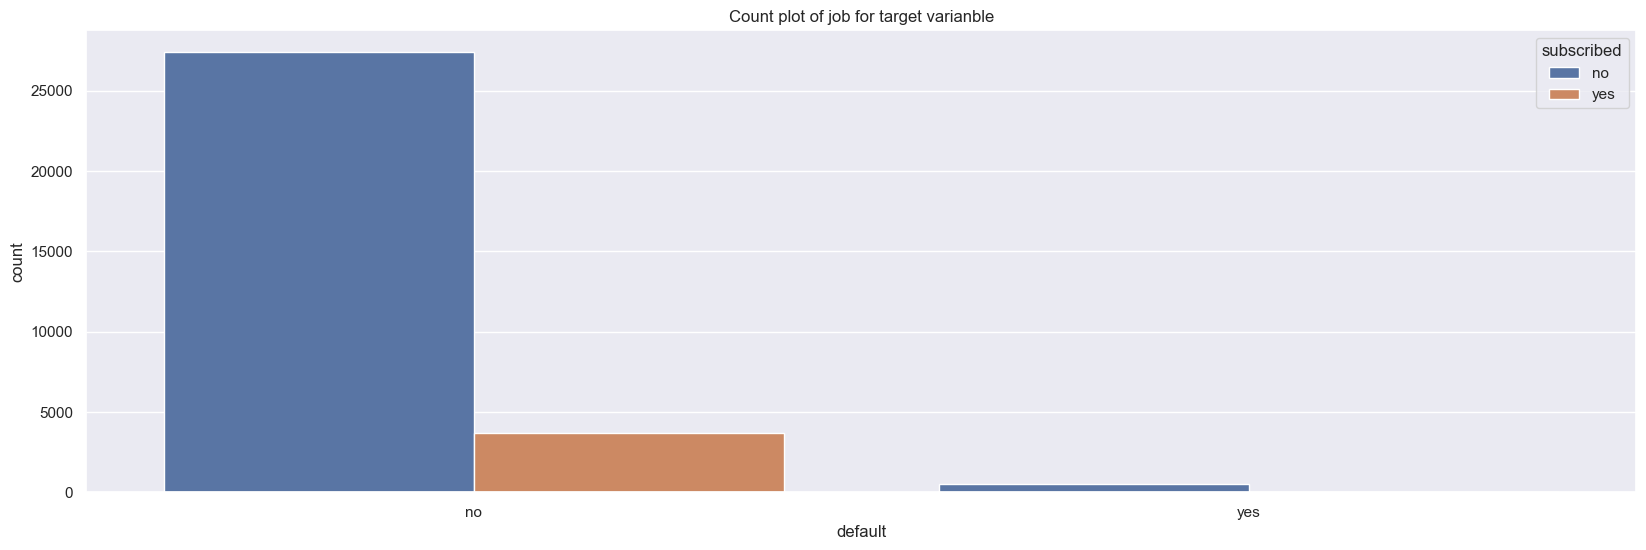

In [43]:
sns.countplot(x=bank['default'], data= bank, hue= bank['subscribed'])
plt.title('Count plot of job for target varianble')

In [44]:

bank[bank['default']== 'yes'].subscribed.count()

585

# loan

In [45]:

bank.loan.value_counts()

no     26516
yes     5131
Name: loan, dtype: int64

Text(0.5, 1.0, 'Count plot of job for target varianble')

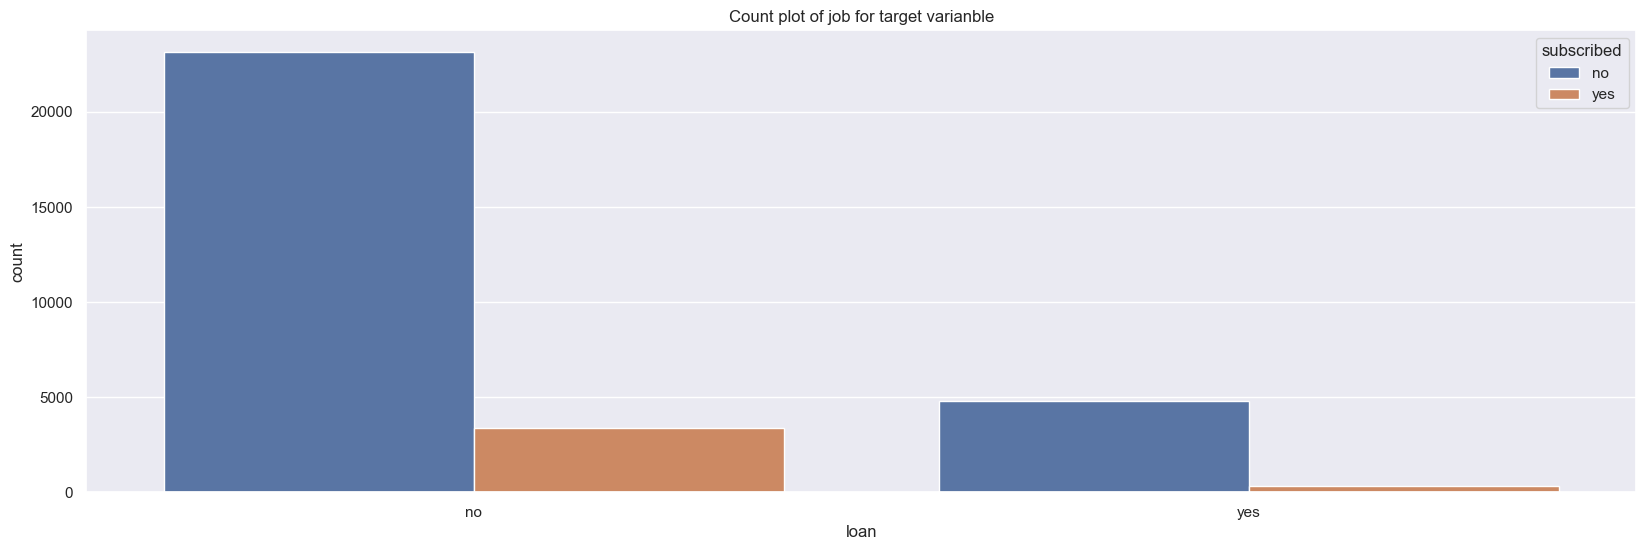

In [46]:
sns.countplot(x=bank['loan'], data= bank, hue= bank['subscribed'])
plt.title('Count plot of job for target varianble')

# Contact

In [47]:
bank.contact.value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

Text(0.5, 1.0, 'Count plot of job for target varianble')

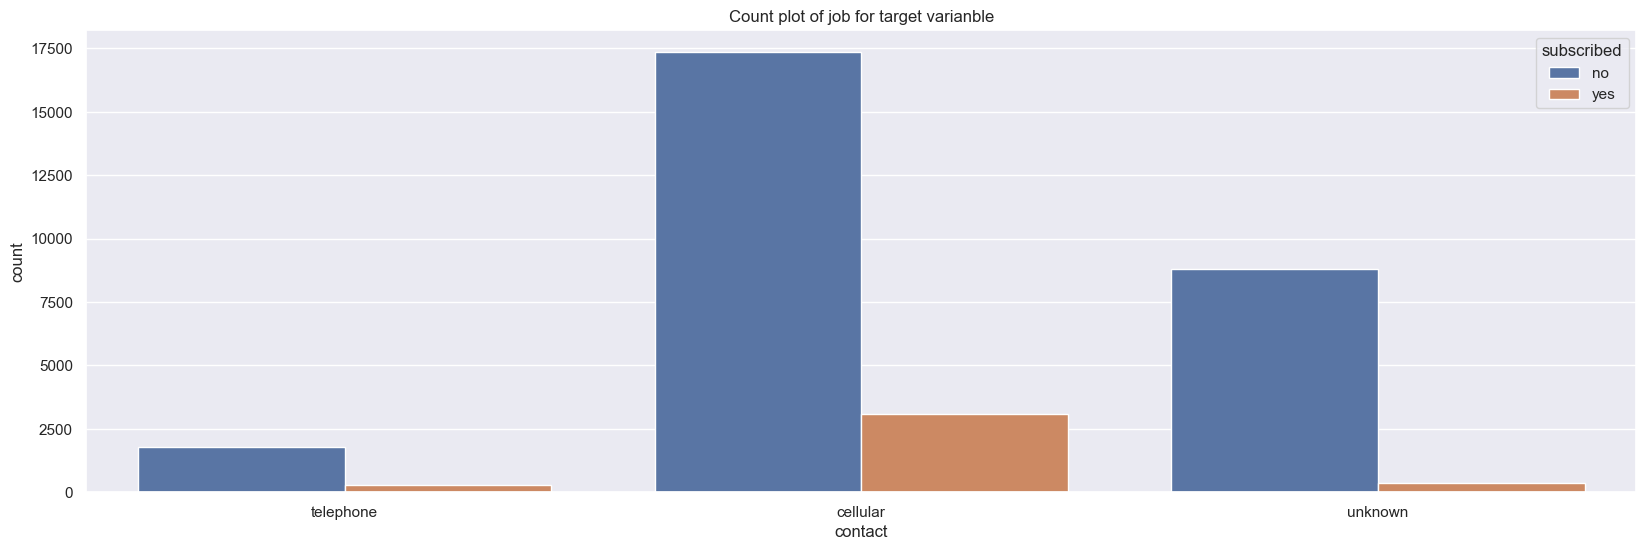

In [48]:
sns.countplot(x=bank['contact'], data= bank, hue= bank['subscribed'])
plt.title('Count plot of job for target varianble')

# Month

In [49]:
bank.month.value_counts()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

Text(0.5, 1.0, 'Count plot of job for target varianble')

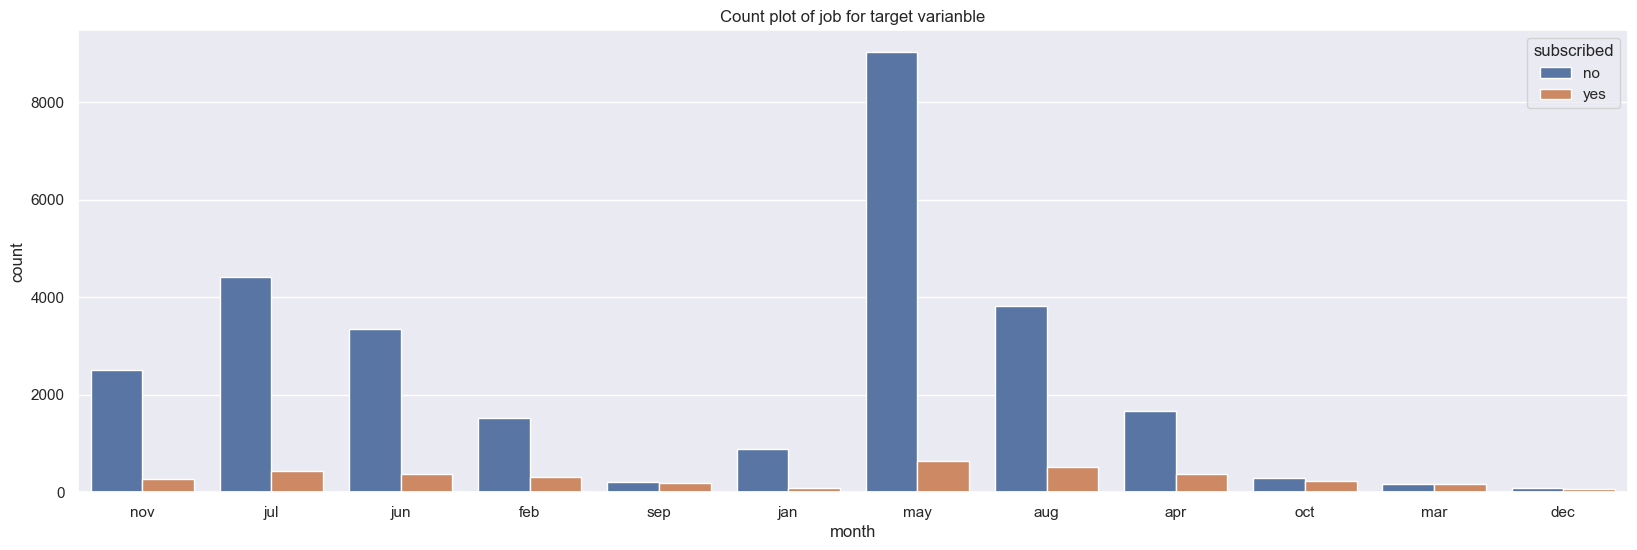

In [50]:
sns.countplot(x=bank['month'], data= bank, hue= bank['subscribed'])
plt.title('Count plot of job for target varianble')    

In [51]:
bank[bank['month']== 'jan'].subscribed.value_counts()

no     880
yes     97
Name: subscribed, dtype: int64

# Pairplot

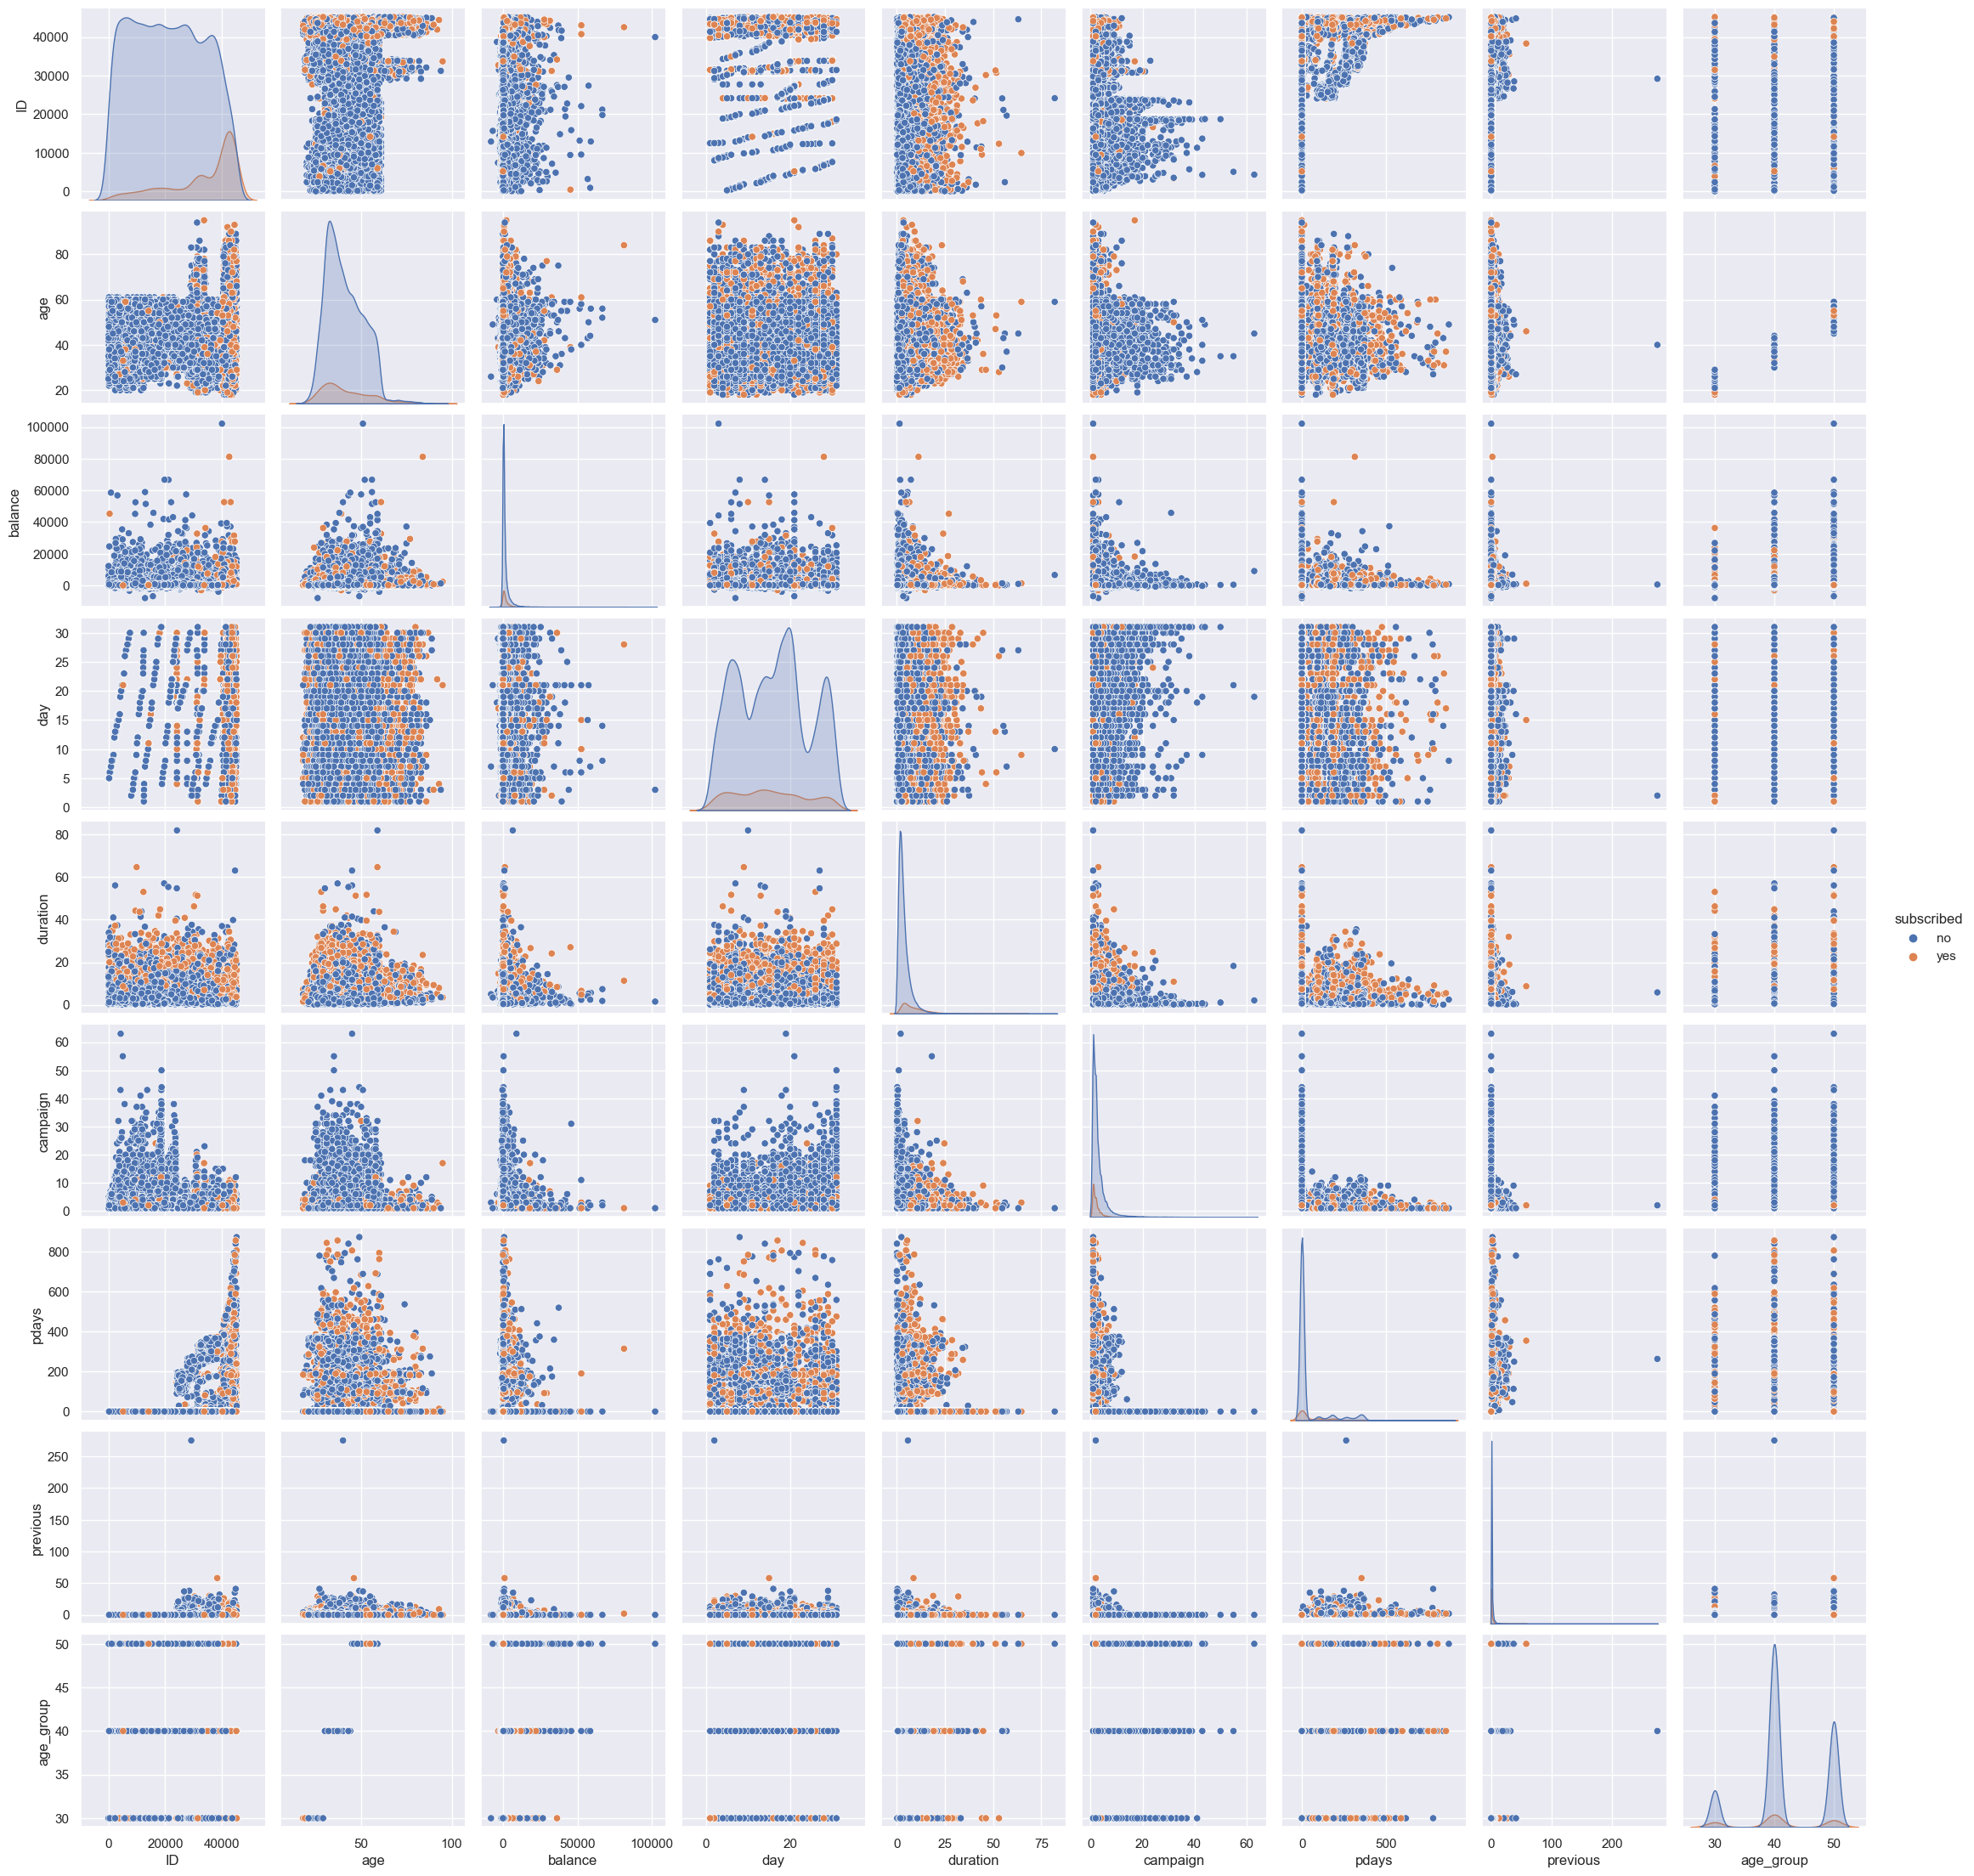

In [52]:
#data.drop('age_group, axis=1, inplace=True')
sns.pairplot(bank, hue = 'subscribed')

# Correlation matrix of numerical features

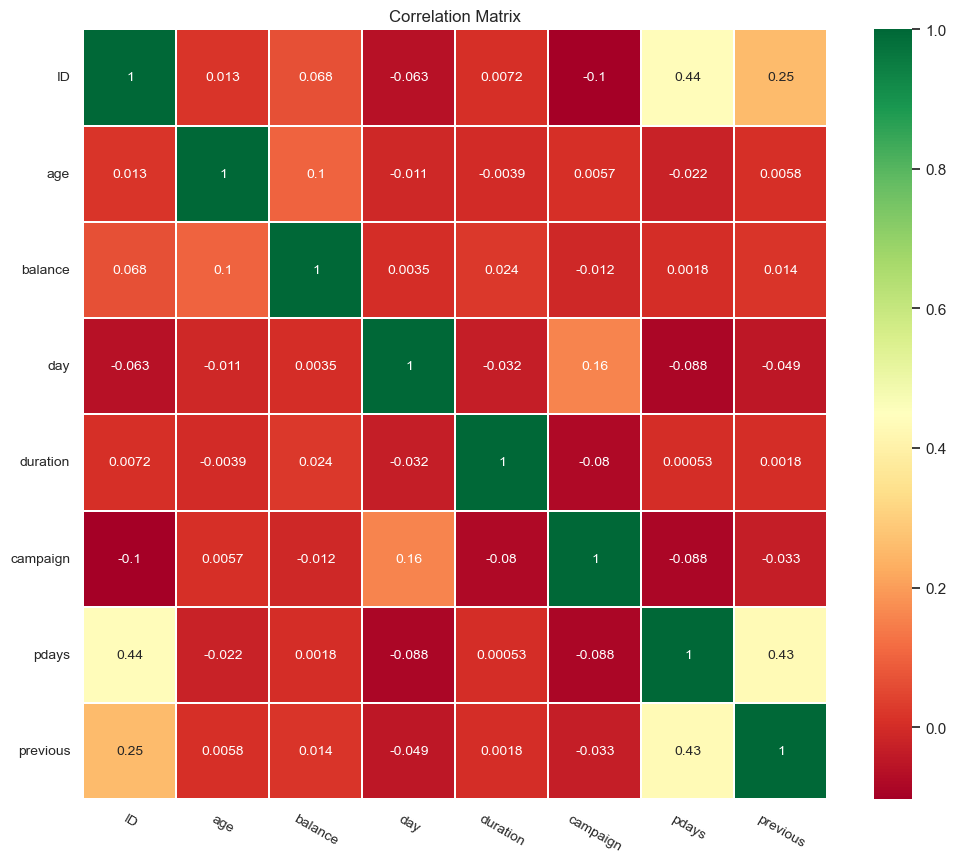

In [53]:
corr_bank = bank[numerical +['subscribed']]
corr = corr_bank.corr()
plt.close()
cor_plot = sns.heatmap(corr,annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':10})
fig = plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10, rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Outlier detection for numerical attributes using IQR

In [55]:
bank_numerical = bank[numerical]
print('Shape of numerical dataframe{}'.format(bank_numerical.shape))
bank_numerical.head()

Shape of numerical dataframe(31647, 8)


,ID,age,balance,day,duration,campaign,pdays,previous
0,26110,56,1933,19,0.733333,2,-1,0
1,40576,31,3,20,1.516667,2,-1,0
2,15320,27,891,18,4.000000,1,-1,0
3,43962,57,3287,22,14.450000,1,84,3
4,29842,31,119,4,6.333333,1,-1,0


In [56]:
q3 = bank_numerical.quantile(0.75)
q1 = bank_numerical.quantile(0.75)
iqr = q3-q1
print('IQR for numerical attributes')
print(iqr)

IQR for numerical attributes
ID          0.0
age         0.0
balance     0.0
day         0.0
duration    0.0
campaign    0.0
pdays       0.0
previous    0.0
Name: 0.75, dtype: float64


In [57]:
bank.shape

(31647, 19)

# Train Test split

In [58]:
bank.replace(to_replace={'subscribed':'yes'},value=1, inplace=True)
bank.replace(to_replace={'subscribed':'no'},value=0, inplace=True)

In [59]:
bank.replace(to_replace={'loan':'yes'},value=1, inplace=True)
bank.replace(to_replace={'loan':'no'},value=0, inplace=True)

In [61]:
bank.replace(to_replace={'default':'yes'},value=1, inplace=True)
bank.replace(to_replace={'default':'no'},value=0, inplace=True)

In [62]:
bank.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_group
0,26110,56,admin.,married,unknown,0,1933,no,0,telephone,19,nov,0.733333,2,-1,0,unknown,0,50.0
1,40576,31,unknown,married,secondary,0,3,no,0,cellular,20,jul,1.516667,2,-1,0,unknown,0,40.0
2,15320,27,services,married,secondary,0,891,yes,0,cellular,18,jul,4.000000,1,-1,0,unknown,0,30.0
3,43962,57,management,divorced,tertiary,0,3287,no,0,cellular,22,jun,14.450000,1,84,3,success,1,50.0
4,29842,31,technician,married,secondary,0,119,yes,0,cellular,4,feb,6.333333,1,-1,0,unknown,0,40.0


In [63]:
data1 = bank.copy()
data1['job'] = data1['job'].astype('category').cat.codes
data1['marital'] = data1['marital'].astype('category').cat.codes
data1['education'] = data1['education'].astype('category').cat.codes
data1['contact'] = data1['contact'].astype('category').cat.codes
data1['poutcome'] = data1['poutcome'].astype('category').cat.codes
data1['month'] = data1['month'].astype('category').cat.codes
data1['default'] = data1['default'].astype('category').cat.codes
data1['loan'] = data1['loan'].astype('category').cat.codes
data1['housing'] = data1['housing'].astype('category').cat.codes

In [64]:
y = bank['subscribed']
x_train, x_test, y_train, y_test = train_test_split(bank.drop(['subscribed'],axis =1), y, test_size=0.20, random_state=42)

In [65]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))
print('Test data shape {} {}'.format(x_test.shape, y_test.shape))

Train data shape (25317, 18) (25317,)
Test data shape (6330, 18) (6330,)
